# Chapter: Vibration-based Condition Monitoring: Signal Processing and Feature Extraction


# Topic: Feature Extraction from a Wind Turbine Vibration signal

In [1]:
# packages
import numpy as np, matplotlib.pyplot as plt
import scipy.io

plt.rcParams.update({'font.size': 12})

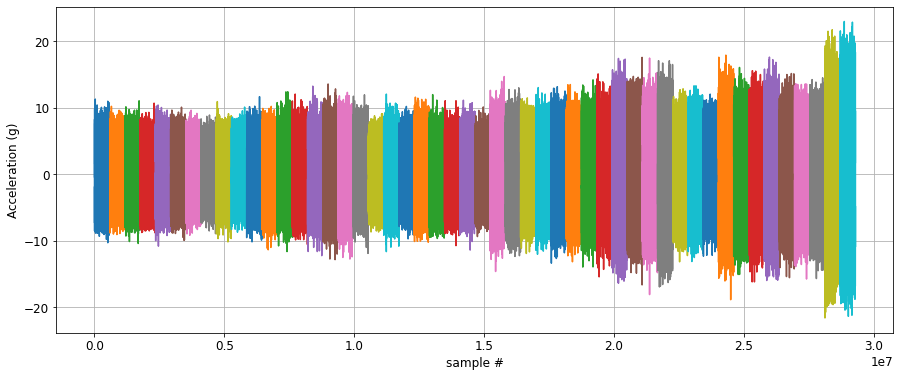

In [2]:
# fetch data from all 50 files and plot 
import glob
FilenamesList = glob.glob('data-2013*.mat')

plt.figure(figsize=(15,6))
x_pos_start = 0
for fileName in FilenamesList:
    matlab_data = scipy.io.loadmat(fileName, struct_as_record = False)
    vib_data = matlab_data['vibration'][:,0]
    
    x_pos_end = x_pos_start + vib_data.shape[0]
    plt.plot(range(x_pos_start, x_pos_end), vib_data)
      
    x_pos_start = x_pos_end # start position of next file data

plt.xlabel('sample #')
plt.ylabel('Acceleration (g)')
plt.grid()

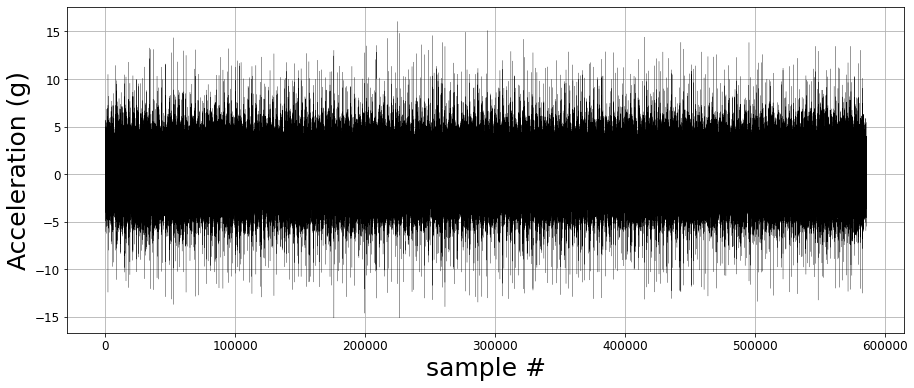

In [3]:
# fetch data for a waveform (file data-20130418T230803Z.mat randomly selected)
matlab_data = scipy.io.loadmat('data-20130418T230803Z.mat', struct_as_record = False)
vib_data = matlab_data['vibration'][:,0]

plt.figure(figsize=(15,6))
plt.plot(vib_data, linewidth=0.2, color='black')
plt.xlabel('sample #', fontsize=25), plt.ylabel('Acceleration (g)', fontsize=25)
plt.grid()

In [4]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                       Time domain features
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [5]:
# compute RMS, STD, peak, peak2peak
N = len(vib_data)
vibStd = np.std(vib_data, ddof=1, axis=0)                                 
vibRMS = np.sqrt(np.sum(vib_data ** 2)/N)
vibPeak = np.max(np.abs(vib_data))
vibPeak2Peak = np.max(vib_data) - np.min(vib_data)

print('Standard deviation: ', vibStd)
print('RMS: ', vibRMS)
print('Peak: ', vibPeak)
print('Peak-to-Peak: ', vibPeak2Peak)

Standard deviation:  2.2876539320865046
RMS:  2.2932661766403255
Peak:  16.04899597
Peak-to-Peak:  31.16318321


In [6]:
#  compute kurtosis, skewness
from scipy.stats import kurtosis, skew

vibKurtosis = kurtosis(vib_data, fisher=False) 
vibSkewness = skew(vib_data, axis=0)

print('Kurtosis: ', vibKurtosis)
print('Skewness: ', vibSkewness) 

Kurtosis:  4.3781876293823485
Skewness:  0.00042258043270898744


In [7]:
# rest of the time domain features
vibMean = np.mean(vib_data)
vibShapeFactor = vibRMS / (np.mean(np.abs(vib_data)))          
vibCrestFactor = np.max(np.abs(vib_data)) / vibRMS
vibImpulseFactor = np.max(np.abs(vib_data)) / (np.mean(np.abs(vib_data)))
vibMarginFactor = np.max(np.abs(vib_data)) / (np.mean(np.sqrt(abs(vib_data))) ** 2)

print('Mean: ', vibMean)
print('Shape Factor: ', vibShapeFactor)
print('Crest Factor: ', vibCrestFactor)
print('Impulse Factor: ', vibImpulseFactor)
print('Margin Factor: ', vibMarginFactor)

Mean:  0.16036887340284603
Shape Factor:  1.2964787900528463
Crest Factor:  6.998313642558517
Impulse Factor:  9.073165203714595
Margin Factor:  10.853946550784945
